<a href="https://colab.research.google.com/github/harirr98/Stock-Mraket-Prediction/blob/main/Stock_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
# CUDA: Let's check that Nvidia CUDA drivers are already pre-installed and which version is it.
!/usr/local/cuda/bin/nvcc --version
# We need to install the correct cuDNN according to this output

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [190]:
%env compute_capability=75

env: compute_capability=75


In [191]:
%cd /content/drive/MyDrive/Stock Market

/content/drive/MyDrive/Stock Market


In [163]:
### Keras and Tensorflow >2.0

In [192]:
import pandas as pd

In [193]:
df=pd.read_csv('BTC-USD Training Data - 1st Jan 2016 to 1st Jan 2022.csv')

In [194]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [195]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2188,2021-12-28,50679.859375,50679.859375,47414.210938,47588.855469,47588.855469,33430376883
2189,2021-12-29,47623.871094,48119.742188,46201.496094,46444.710938,46444.710938,30049226299
2190,2021-12-30,46490.605469,47879.964844,46060.312500,47178.125000,47178.125000,26686491018
2191,2021-12-31,47169.371094,48472.527344,45819.953125,46306.445313,46306.445313,36974172400
2192,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004


In [196]:
df1=df.reset_index()['Close']

In [197]:
df1

0         434.334015
1         433.437988
2         430.010986
3         433.091003
4         431.959991
            ...     
2188    47588.855469
2189    46444.710938
2190    47178.125000
2191    46306.445313
2192    47686.812500
Name: Close, Length: 2193, dtype: float64

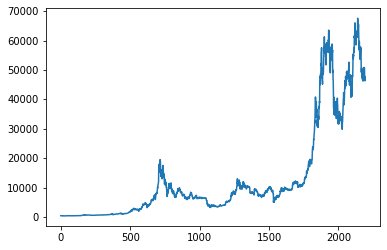

In [198]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [199]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [200]:
import numpy as np

In [201]:
df1

0         434.334015
1         433.437988
2         430.010986
3         433.091003
4         431.959991
            ...     
2188    47588.855469
2189    46444.710938
2190    47178.125000
2191    46306.445313
2192    47686.812500
Name: Close, Length: 2193, dtype: float64

In [202]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [203]:
print(df1)

[[0.00104167]
 [0.00102834]
 [0.00097734]
 ...
 [0.69660795]
 [0.68363701]
 [0.70417743]]


In [204]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [205]:
training_size,test_size

(1425, 768)

In [206]:
train_data

array([[0.00104167],
       [0.00102834],
       [0.00097734],
       ...,
       [0.10466078],
       [0.09945443],
       [0.10091593]])

In [207]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [208]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [209]:
print(X_train.shape), print(y_train.shape)

(1324, 100)
(1324,)


(None, None)

In [210]:
print(X_test.shape), print(ytest.shape)

(667, 100)
(667,)


(None, None)

In [211]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [212]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [213]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [214]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [215]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [218]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Epoch 1/150
21/21 [==============================] - 9s 419ms/step - loss: 3.0018e-05 - val_loss: 0.0043
Epoch 2/150
21/21 [==============================] - 5s 241ms/step - loss: 3.0220e-05 - val_loss: 0.0038
Epoch 3/150
21/21 [==============================] - 5s 237ms/step - loss: 3.2367e-05 - val_loss: 0.0026
Epoch 4/150
21/21 [==============================] - 5s 239ms/step - loss: 3.0796e-05 - val_loss: 0.0040
Epoch 5/150
21/21 [==============================] - 5s 242ms/step - loss: 2.8261e-05 - val_loss: 0.0039
Epoch 6/150
21/21 [==============================] - 5s 233ms/step - loss: 2.6962e-05 - val_loss: 0.0034
Epoch 7/150
21/21 [==============================] - 5s 231ms/step - loss: 2.6665e-05 - val_loss: 0.0024
Epoch 8/150
21/21 [==============================] - 5s 237ms/step - loss: 2.8615e-05 - val_loss: 0.0035
Epoch 9/150
21/21 [==============================] - 5s 241ms/step - loss: 2.7375e-05 - val_loss: 0.0036
Epoch 10/150
21/21 [==============================] - 5

In [219]:
import tensorflow as tf

In [220]:
tf.__version__

'2.7.0'

In [221]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [222]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [223]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

6493.620151057447

In [224]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

33546.6697070599

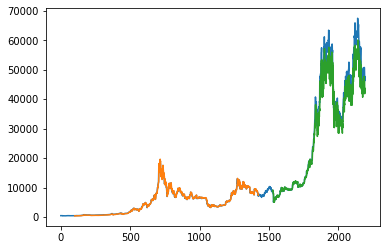

In [225]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [226]:
len(test_data)

768

In [270]:
x_input=test_data[668:].reshape(1,-1)
x_input.shape


(1, 100)

In [271]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [272]:
temp_input

[0.6320512007641813,
 0.6302185865718853,
 0.6375389293270218,
 0.6230631488794044,
 0.6051889990891297,
 0.6130729369577955,
 0.646204611301083,
 0.7105779167538119,
 0.7045446123036865,
 0.7118131642898995,
 0.7253982133278892,
 0.761139595844046,
 0.8183790866847156,
 0.7952331485067357,
 0.7976417387810595,
 0.8125277183608054,
 0.8096015691938083,
 0.8499752316889838,
 0.8284919456410609,
 0.8487298701239685,
 0.8475457739758019,
 0.9111211761319394,
 0.9006785652028838,
 0.9105210194008378,
 0.9175514268584509,
 0.9508227212069549,
 0.9765783675578042,
 0.92029081539101,
 0.8977037640937777,
 0.9081401554920443,
 0.9012537856433482,
 0.9326363736577323,
 0.8928159597706781,
 0.8648198832806554,
 0.8966602179609117,
 0.9205555818767749,
 0.915509150159529,
 0.9070291825343808,
 0.9023485412720951,
 0.9354127306826253,
 0.9315980589078506,
 0.9090123445252248,
 0.9041530803320589,
 0.9101320945823292,
 0.936909489602222,
 1.0,
 0.991146162339174,
 0.9617335997055719,
 0.96105997100

In [276]:
# demonstrate prediction for next 50 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<50):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.95391093 0.96875134 0.94034512 0.88980198 0.89287874 0.84190035
 0.85942115 0.88289672 0.86851156 0.83218571 0.85122943 0.83205382
 0.84684872 0.79171812 0.81024887 0.84645852 0.85476341 0.84284211
 0.84618131 0.83499108 0.79214192 0.72670472 0.72920678 0.74726827
 0.74901614 0.74611016 0.70395881 0.69757785 0.72911244 0.74006186
 0.69005099 0.6881932  0.72218137 0.70385918 0.68208497 0.69170713
 0.68959766 0.69217586 0.72277496 0.71819029 0.75027284 0.75083318
 0.74499506 0.7506445  0.74812826 0.70271979 0.68569446 0.69660795
 0.68363701 0.70417743 0.66433406 0.57316869 0.51136428 0.48381814
 0.46571469 0.44586971 0.42416576 0.40286517 0.38330445 0.3657921
 0.35015863 0.33611789 0.32341012 0.31183389 0.30123854 0.29151049
 0.28256005 0.27431366 0.26670903 0.2596921  0.2532157  0.24723791
 0.24172148 0.23663296 0.23194185 0.22762026 0.22364233 0.21998401
 0.21662274 0.21353729 0.21070766 0.2081151  0.20574194 0.20357157
 0.20158854 0.19977827 0.19812727 0.19662289 0.1952

In [277]:
x_input.shape

(1, 100, 1)

In [278]:
day_new=np.arange(1,101)
day_pred=np.arange(101,151)

In [279]:
import matplotlib.pyplot as plt

In [280]:
len(df1)

2193

In [281]:
#Here we are having 2193 days data
#Now we plot after 30 days data by using before 100 days data

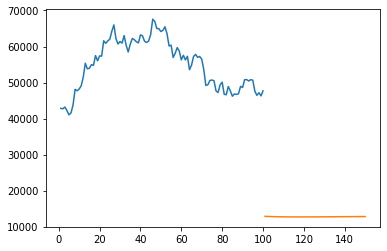

In [282]:
plt.plot(day_new,scaler.inverse_transform(df1[2093:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

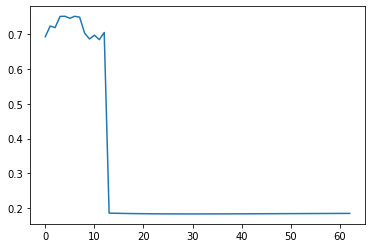

In [283]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2180:])

In [284]:
df3=scaler.inverse_transform(df3).tolist()

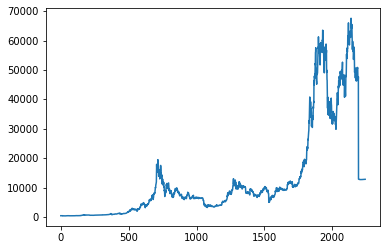

In [285]:
plt.plot(df3)